In [85]:
import numpy as np
import matplotlib.pyplot as plt

#### Tipos de señales
1. **Señales analogica.**
amplitud y tiempos continuos.
2. **Señales muestreadas.**
 tiempo discreto ampitud continua
2. **Señales cuantizada.**
 tiempo continuo, amplitud discreta
3. **Señales digital.**
 tiempo y amplitud discretos
Señal aleatoria. Tenemos que tener cuidado al momento de tomar mediciones en una señal aleatoria para evitar realizar medicion de ruidos en lugar de la variable a medir



#### Dominios de representacion
  Dominio en el tiempo.
  Dominio en la frecuencia.
  Normalmente es dificil distinguir información en señales del dominio del tiempo, sin embargo, si se analizan bajo el dominio de frecuencias, se pueden obtener mejores datos.
#### Señales periodicas y no periodicas
  Las señales no periodicas cambian continuamente con el tiempo


Investigar procesamiento digital de señales


# Sistemas
Un sistema es un conjunto físico de componentes que actuan entre sí para obtener un resultado.

#### Entradas y salidas de un sistema
Un sistema SISO tiene una entrada y una salida, un sistema MIMO, tiene multiples entradas y multiples salidas

#### Propiedades de los sistemas
1. **Sistema estático o sin memoria:** a cada valor de n, lo multiplico por un valor y obtengo el valor de ese instante
2. **Sistema con memoria** los valores dependen de un cálculo de otros valores para obtener la salida
3. **Sistemas lineales y no lineales** un sistema es lineal si tiene 2 propiedades matemáticas:
    1. Homogeneidad: la salida responde a una formula en todos sus puntos con respecto a la entrada
    2. Adición: si la suma de 2 entradas tiene como resultado la salida, es un sistema lineal
    3. satisface el principio de superposición: hoogeneidad y adición
* Ejemplos:
    * Propagacion de ondas
    * Circuitos
    * **Son muchos ejemplos mas**
4. **Sistemas no lineales**
* Ejemplos
    * Un ejemplo de sistema no lineal es un transmisor AM 
    * Sistemas sin fidelidad sinusoidal
    * Multiplicador de una señal
    * Fenomenos con histéresis
    * Sistemas con memoria


#### Sintesis y descomposicion** 
Cuando se trata de sistemas lineales, la unica forma que se pueden combinar las señales es por escala seguida de suma.
El concepto fundamental de los señales es ue las puedo descomponer, y luego de procesarlas, puedo hacer una síntesis para obtener la suma de cada señal descompuesta.



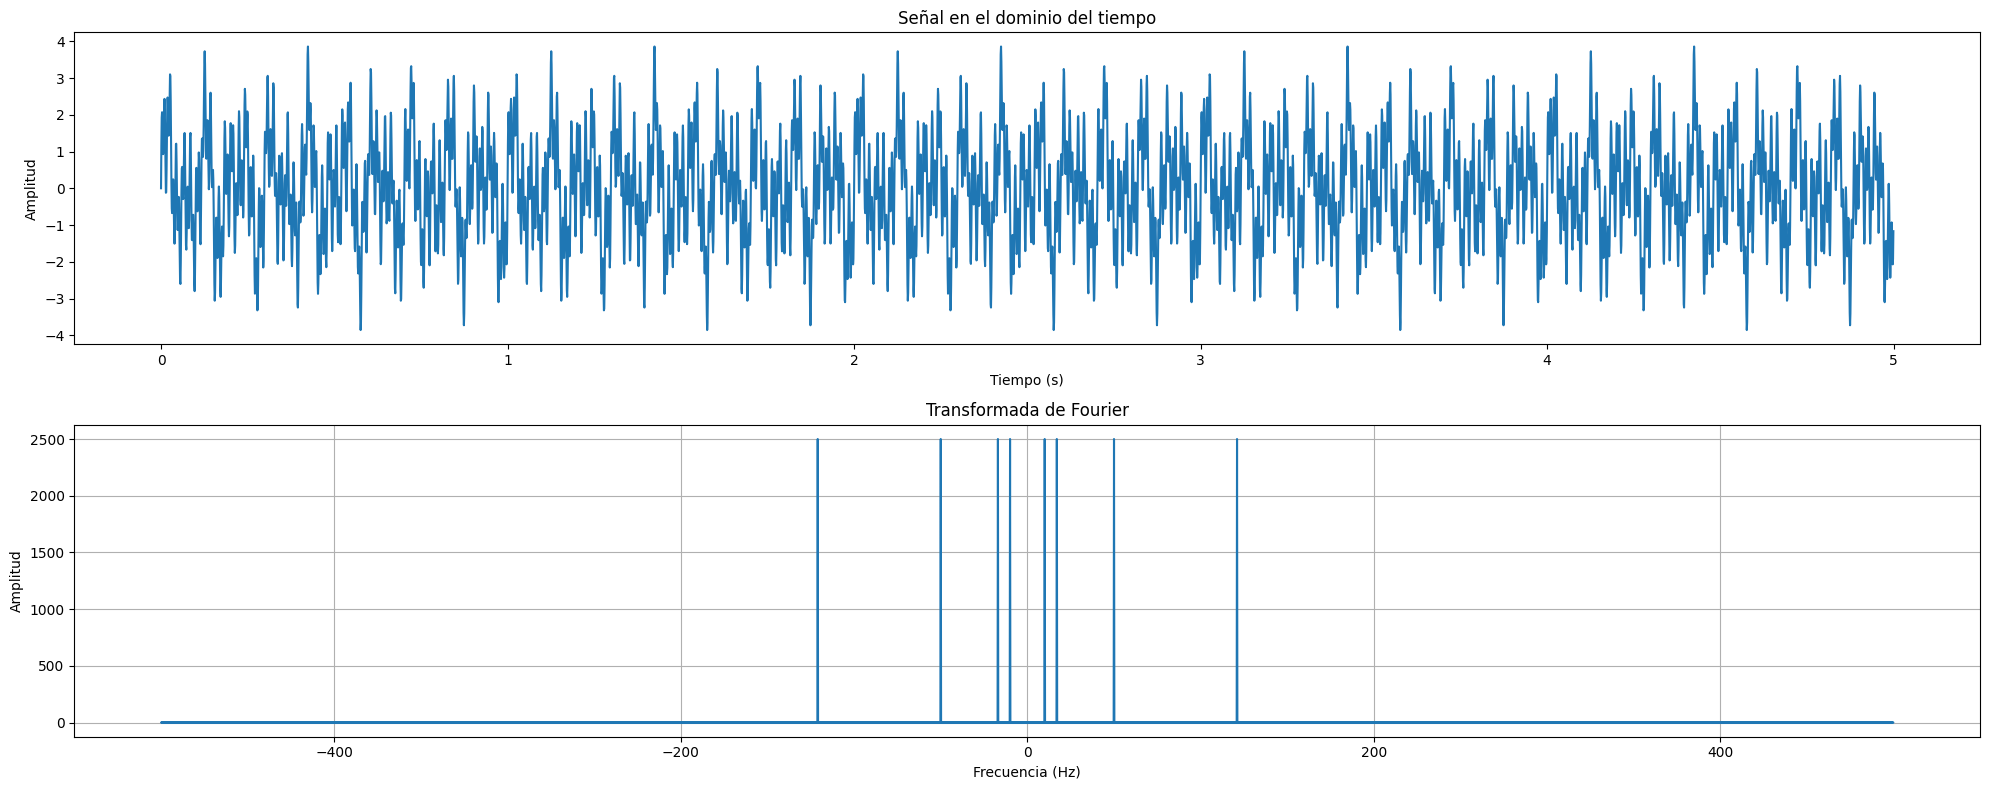

In [88]:
# Crear una señal de ejemplo
frecuencia_muestreo = 1000  # Frecuencia de muestreo en Hz
tiempo_total = 5  # Duración total de la señal en segundos
t = np.linspace(
    0, tiempo_total, tiempo_total * frecuencia_muestreo, endpoint=False
)  # Eje temporal
frecuencia_señal = 10  # Frecuencia de la señal en Hz
senal = np.sin(2 * np.pi * frecuencia_señal * t)  # Señal sinusoidal de frecuencia 10 Hz
senal1 = np.sin(2 * np.pi * 50 * t)  # Señal sinusoidal de frecuencia 50 Hz
senal2 = np.sin(2 * np.pi * 17 * t)  # Señal sinusoidal de frecuencia 17 Hz
senal3 = np.sin(2 * np.pi * 121 * t)  # Señal sinusoidal de frecuencia 121 Hz

senal = senal + senal1 + senal2 + senal3
# Calcular la transformada de Fourier
transformada = np.fft.fft(senal)
frecuencias = np.fft.fftfreq(len(transformada), d=1 / frecuencia_muestreo)

# Graficar la señal en el dominio del tiempo
plt.figure(figsize=(20, 8))
plt.subplot(2, 1, 1)
plt.plot(t, senal)
plt.title("Señal en el dominio del tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")

# Graficar la transformada de Fourier
plt.subplot(2, 1, 2)
plt.plot(frecuencias, np.abs(transformada))
plt.title("Transformada de Fourier")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.grid(True)

plt.tight_layout()
plt.show()

#### Sistemas causales y no causales
1. **Causal:** un sistema que se ejecuta en tiempo real.
1. **No causal:** un sistema que se ejecuta con señales guardadas con anterioridad.

#### Sistemas estable e inestables
Cuando una señal no está acotada en los valores definidos se considera un sistema inestable

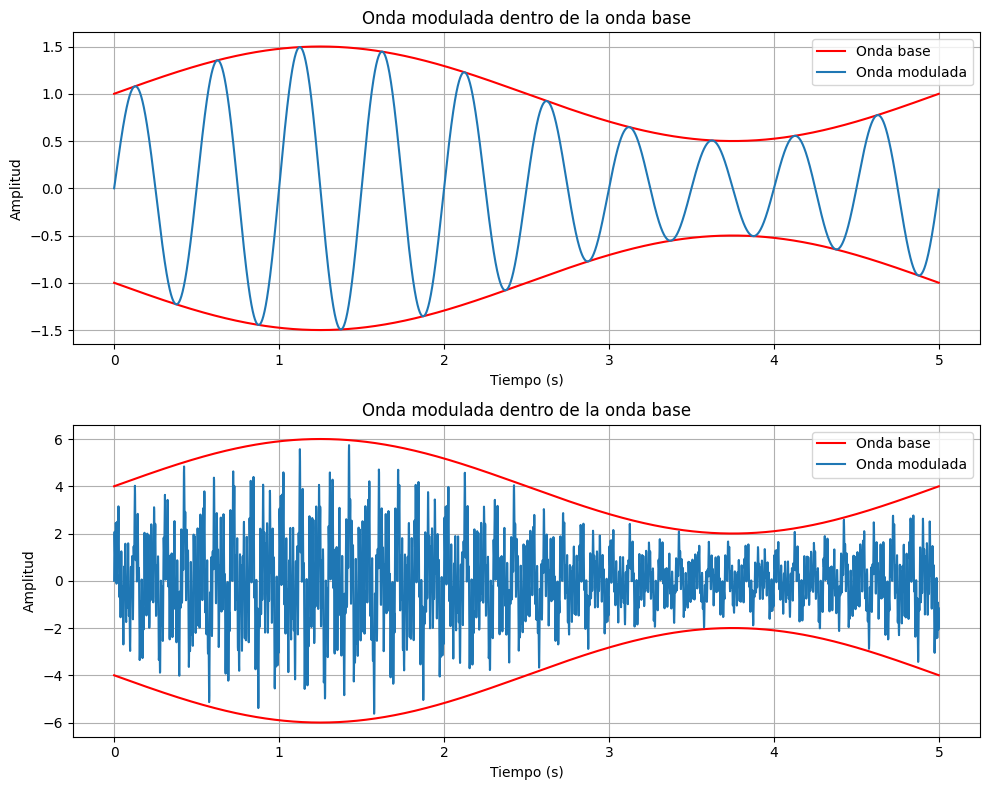

In [98]:
# Parámetros de la onda modulada
frecuencia_moduladora = 0.2  # Frecuencia de la onda moduladora en Hz
amplitud_moduladora = 0.5  # Amplitud de la onda moduladora
frecuencia_portadora = 2  # Frecuencia de la onda portadora en Hz
amplitud_portadora = 1  # Amplitud de la onda portadora

# Definir el dominio de tiempo
tiempo_total = 5  # Duración total de la señal en segundos
frecuencia_muestreo = 1000  # Frecuencia de muestreo en Hz
# t = np.linspace(0, tiempo_total, tiempo_total * frecuencia_muestreo, endpoint=False)

# Calcular la onda moduladora
onda_moduladora = amplitud_moduladora * np.sin(2 * np.pi * frecuencia_moduladora * t)

# Calcular la onda modulada (producto de las ondas moduladora y portadora)
onda_modulada = (
    (1 + onda_moduladora)
    * amplitud_portadora
    * np.sin(2 * np.pi * frecuencia_portadora * t)
)

onda_modulada_suma = (1 + onda_moduladora) * amplitud_portadora * senal

onda_moduladora_ver = onda_moduladora + 1
onda_moduladora_inversa = -onda_moduladora_ver

onda_moduladora_suma = onda_moduladora * 4 + 4
onda_moduladora_inversa_suma = -onda_moduladora_suma

# Graficar las ondas
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(t, onda_moduladora_ver, label="Onda base", color="red")
plt.plot(t, onda_moduladora_inversa, color="red")
plt.plot(t, onda_modulada, label="Onda modulada")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Onda modulada dentro de la onda base")
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, onda_moduladora_suma, label="Onda base", color="red")
plt.plot(t, onda_moduladora_inversa_suma, color="red")
plt.plot(t, onda_modulada_suma, label="Onda modulada")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Onda modulada dentro de la onda base")
plt.legend()

plt.tight_layout()
plt.grid(True)
plt.show()